## Team G17 Members:
>### - Javier Martinez Velasco:2058968
>### - Nemish Murawat:2056142
>### - Matteo Migliarini:1886186
>### - Mattia Castaldo:1837100




# Data View

In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt




%load_ext autoreload
%autoreload 2
from util import to_corr_matrix

df = pd.read_csv("data/train_hw03.csv")
df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,id,age,sex,y,t1_2001,t2_2001,t3_2001,t4_2001,t5_2001,t6_2001,...,t106_9170,t107_9170,t108_9170,t109_9170,t110_9170,t111_9170,t112_9170,t113_9170,t114_9170,t115_9170
0,1,18.4148,male,autism,-0.458933,-0.471744,-0.461779,-0.305860,0.047765,0.356486,...,-1.996018,-1.275805,-0.371995,-0.863312,-2.453302,-2.897479,-0.681213,2.771550,4.376339,2.915170
1,7,13.5800,male,autism,-44.830406,431.883087,898.798157,926.675476,467.511444,-105.597237,...,858.979919,3550.427979,7169.964844,9281.972656,8176.752930,4087.208008,-844.500122,-4014.025635,-4296.233887,-2987.512695
2,10,18.4175,male,autism,-0.536675,-0.692978,-0.494424,0.052672,0.580352,0.634929,...,-2.918994,-0.305058,0.293893,-1.441216,-2.808750,-1.520393,1.636729,4.163283,5.010502,5.159610
3,12,17.1000,male,control,-0.356160,-0.612644,-0.175026,0.923642,2.219596,3.136657,...,-3.818442,6.657434,13.913865,11.425905,2.044530,-5.044302,-4.298348,1.248278,5.167187,5.212446
4,13,17.7800,male,control,0.532626,0.372084,0.096217,-0.236015,-0.548263,-0.364282,...,-2.548552,-2.195497,0.857750,1.657618,0.908618,1.275948,1.349784,-0.099559,-1.511268,-1.784074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,794,11.0800,male,autism,1.605719,2.087463,1.628545,0.725985,0.269245,0.587729,...,-0.119474,1.007243,1.920006,1.698236,0.360375,-1.024146,-1.301874,-0.337484,0.892852,1.302862
596,795,30.0000,male,control,0.087450,1.267322,0.487800,-0.937467,-0.388316,0.680387,...,-0.060937,-2.922512,-2.003564,3.152400,4.499738,-1.591714,-6.111772,-1.400208,6.071485,6.663968
597,796,11.2000,male,control,0.004827,-0.561140,-1.022752,-1.409737,-1.673823,-1.672471,...,-5.140858,-3.528592,-3.022926,-2.655292,-0.777803,2.447924,4.820030,4.295342,1.235895,-1.585241
598,798,27.7600,female,control,0.009636,-0.009336,-0.029836,-0.029555,-0.007096,0.015947,...,-0.442446,-0.231439,0.080499,0.279456,0.257785,0.105656,-0.012517,-0.038396,-0.040254,-0.075864


# Feature Engineering : Pearson Correlation features
This is an attempt to train a better model by using as features the correlation between ROIs per subject.

In [14]:
X = df.iloc[:, 4:].apply(to_corr_matrix, axis=1).tolist()
X[0] # each df row will be transformed into a correlation matrix

array([[ 1.        ,  0.59852271,  0.01596276, ..., -0.29558198,
         0.10804935, -0.0702961 ],
       [ 0.59852271,  1.        , -0.24094922, ..., -0.09276029,
        -0.11123823, -0.22337476],
       [ 0.01596276, -0.24094922,  1.        , ...,  0.06447252,
        -0.08096899,  0.22820237],
       ...,
       [-0.29558198, -0.09276029,  0.06447252, ...,  1.        ,
         0.24128592,  0.39596832],
       [ 0.10804935, -0.11123823, -0.08096899, ...,  0.24128592,
         1.        ,  0.48430787],
       [-0.0702961 , -0.22337476,  0.22820237, ...,  0.39596832,
         0.48430787,  1.        ]])

Naively we would have 116x116 features, but we can reduce them to half by considering that a corr matrix is symmetric matrix and that all the values on the diagonal are 1; so we can discard more than half of the features. Just use the upper triangle values.

In [15]:
# take only the upper triangular (all the rest of values are the same or 1)
upper_triangular_idx = np.triu_indices(116, k=1)
X = [x[upper_triangular_idx] for x in X]

 Example of Intended Pre-Processing modification to the original Dataset. Finally,We would implement this preprocessing using Data Transformer pipeline making it more general.

In [16]:
ROIs = df.columns.str.extract(r't\d+_(\d+)')[0].unique()[1:]
ROIs_cross = [ROIs[i]+'x'+ROIs[j] for i in range(116) for j in range(i+1,116)]

# create new df from extracted features
train_data = df.iloc[:,:4].copy()
cor_df = pd.DataFrame(np.vstack(X), columns = ROIs_cross)

train_data = pd.concat([train_data, cor_df], axis=1)
train_data = train_data.set_index('id')
train_data

,age,sex,y,2001x2002,2001x2101,2001x2102,2001x2111,2001x2112,2001x2201,2001x2202,...,9130x9140,9130x9150,9130x9160,9130x9170,9140x9150,9140x9160,9140x9170,9150x9160,9150x9170,9160x9170
id,,,,,,,,,,,,,,,,,,,,,
1,18.4148,male,autism,0.598523,0.015963,-0.401368,-0.060398,-0.088864,-0.125210,-0.195189,...,0.273323,0.264100,0.424808,0.420131,0.382996,0.207414,0.077920,0.241286,0.395968,0.484308
7,13.5800,male,autism,0.118297,0.005151,0.102539,-0.180245,-0.127210,0.018084,-0.004339,...,0.888996,0.137735,-0.508790,-0.679644,0.410223,-0.227966,-0.452212,0.586639,0.394228,0.919312
10,18.4175,male,autism,0.569176,0.411863,-0.063449,0.144125,-0.059064,0.160399,0.025133,...,0.504460,0.194350,0.525071,0.513382,0.493730,0.355361,0.391225,0.479056,0.346927,0.688313
12,17.1000,male,control,0.640348,-0.221460,-0.188593,-0.287224,-0.208609,-0.072819,0.128095,...,0.429451,0.318852,-0.115061,-0.049994,0.381939,0.090490,0.082956,0.396449,-0.001523,0.213470
13,17.7800,male,control,0.290582,-0.112390,-0.113786,-0.126013,-0.072083,-0.028029,-0.236445,...,0.601165,0.455271,0.310264,-0.033721,0.374615,0.240237,0.053896,0.756615,0.379470,0.327635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,11.0800,male,autism,0.306915,0.181358,-0.607665,0.064164,0.426378,0.411998,-0.200528,...,0.691790,0.404769,0.349493,0.314743,0.550258,0.389888,0.343335,0.686072,0.515995,0.621507
795,30.0000,male,control,0.723682,-0.026289,-0.488542,-0.006708,-0.236119,-0.500962,-0.509984,...,0.300936,0.004818,0.109356,0.020918,-0.165635,-0.012364,0.255707,0.537208,0.234801,0.039268
796,11.2000,male,control,0.538899,0.454368,-0.162851,-0.215812,-0.112210,0.256790,0.179207,...,0.346542,-0.181252,0.268167,0.091870,0.076441,0.335464,0.169772,0.073574,0.433119,0.421155


### Data Transformer pipeline
Now we put the process above in a single pipeline, in such a way to make it easily reproducible

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer as mk_transformer, make_column_selector as select
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder


def to_corr_features(features):
    '''transforms a df row into a df row of correlations'''
    upper_triangular_idx = np.triu_indices(116, k=1)
    
    cor_mat = features\
                .apply(to_corr_matrix, axis=1)\
                .apply(lambda x: x[upper_triangular_idx])\
                .values
    
    return pd.DataFrame(np.vstack(cor_mat), columns = ROIs_cross)
   
correlation_transformer = mk_transformer(
    (FunctionTransformer(func=to_corr_features), select(r't\d+_\d+')),
    (OneHotEncoder(drop='if_binary'), ['sex']),
    remainder='passthrough'
)

correlation_transformer.fit_transform(df)

array([[0.5985227114631797, 0.015962763780229653, -0.40136757512637655,
        ..., 1, 18.4148, 'autism'],
       [0.11829666496953581, 0.005150717868535977, 0.1025392922353061,
        ..., 7, 13.58, 'autism'],
       [0.5691762086393266, 0.41186344950053266, -0.06344889429236682,
        ..., 10, 18.4175, 'autism'],
       ...,
       [0.5388988333385168, 0.4543684239417609, -0.16285110793280377,
        ..., 796, 11.2, 'control'],
       [0.4789507808612538, -0.18559863223378573, -0.4550905584825864,
        ..., 798, 27.76, 'control'],
       [0.5483511340347516, 0.09435035268812417, -0.12314326690392169,
        ..., 799, 22.0, 'autism']], dtype=object)

### Data split
This data split won't be used very much later because we prefer doing cross validation.

In [18]:
from sklearn.model_selection import train_test_split
df = df.set_index('id') if df.index.name != 'id' else df
X = df.loc[:, df.columns!='y']
y = (df.y == 'autism').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7)

# Train 


Here's the train pipeline and a fit without parameter tuning.

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer


pipe = make_pipeline(
    correlation_transformer,
    KNNImputer(),
    SVC()
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer',
                                                  FunctionTransformer(func=<function to_corr_features at 0x0000017CD63905E0>),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017C8A915460>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('knnimputer', KNNImputer()), ('svc', SVC())])

### Confusion Matrix

('Accuracy', 0.5722222222222222)

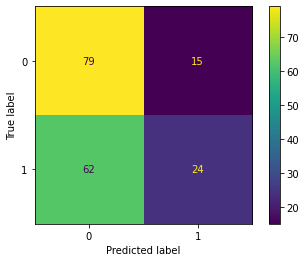

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

y_hat = pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)
'Accuracy', sum(y_hat == y_test) / len(y_hat)

## GridSearch
The number of parameters for the SVC is rather small, and by looking at the results it also appears that the `class_weight` isn't that effective at all, mainly we need to tune the `C` parameter, which is the regularization term.

Best Params I obtained: `{'svc__C': 2.66, 'svc__class_weight': None,''knnimputer__n_neighbors': 4'}`

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
   'svc__C' : np.arange(2, 3, 0.02),
#    'svc__class_weight' : ['balanced', None],
    
    'knnimputer__n_neighbors' : [4,5,6,7,10]
}
model = GridSearchCV(
    pipe, 
    param_grid, 
    scoring = 'accuracy', 
    n_jobs=-1, verbose = 10)
model.fit(X, y)
model.best_params_, model.best_score_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


({'knnimputer__n_neighbors': 4, 'svc__C': 2.6600000000000006},
 0.6033333333333333)

In [21]:
model

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('functiontransformer',
                                                                         FunctionTransformer(func=<function to_corr_features at 0x0000017CBAEB39D0>),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000017C8581C700>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['s...
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'knnimputer__n_neighbors': [4, 5, 6, 7, 10],
                         'svc__C': array([2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 ,
       2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42,
       2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64,
       2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84, 2.86,
       2.88, 2.9 , 2.92, 2.94, 2.96, 2.98])},
             scoring='accuracy', verbose=10)

<AxesSubplot:xlabel='param_svc__C', ylabel='value'>

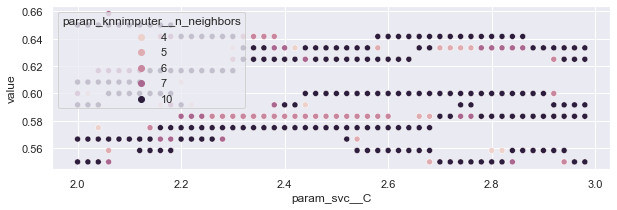

In [22]:
res = pd.DataFrame(model.cv_results_)
res = res.fillna('unadjusted')
cols = lambda rex: res.columns.to_series().filter(regex=rex).tolist()
res = res.melt(id_vars=cols(r'param_.*'), value_vars=cols(r'split\d+_.*'))


sns.set(rc={'figure.figsize':(10,3)})

# if you have more than 2 hyperparams:
# for param in param_grid.keys():
#     sns.boxplot(res, x = 'value', y = 'param_' + param, orient='h')
#     plt.show()
sns.scatterplot(data=res, x='param_svc__C', y = 'value', hue = 'param_knnimputer__n_neighbors')

Comment: 
- it appears that the class_weight doesn't make that much of a difference.
- also it looks like that over some value of `C` (like 3) the performance is always the same and it's not worth exploring


![gridsearch 1](output/SVC_gridsearch_C[0,10].png "Gridsearch for C $\in$ [0,10]")



# Submission
Code for submitting to the competition, just run this cell and upload the results.

In [23]:
from sklearn.base import clone

final = clone(pipe)
BEST_PARAMS = model.best_params_ #{'svc__C': 2.5, 'svc__class_weight': None} # model.best_params_
final.set_params(**BEST_PARAMS)
final.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer',
                                                  FunctionTransformer(func=<function to_corr_features at 0x0000017CD63905E0>),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000017C8AD5EA30>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex'])])),
                ('knnimputer', KNNImputer(n_neighbors=4)),
                ('svc', SVC(C=2.6600000000000006))])

In [24]:
competition = pd.read_csv("data/test_hw03.csv")
competition = competition.set_index('id') if competition.index.name != 'id' else competition
X_compete = competition.loc[:, competition.columns!='y']


competition['target'] = np.where(final.predict(X_compete), 'autism', 'control')
competition['target'].to_csv('data/submission.csv')

In [25]:
model

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('functiontransformer',
                                                                         FunctionTransformer(func=<function to_corr_features at 0x0000017CBAEB39D0>),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000017C8581C700>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['s...
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'knnimputer__n_neighbors': [4, 5, 6, 7, 10],
                         'svc__C': array([2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 ,
       2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42,
       2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64,
       2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84, 2.86,
       2.88, 2.9 , 2.92, 2.94, 2.96, 2.98])},
             scoring='accuracy', verbose=10)

# Variable Importance:

> #### -Since we are using Non-Linear SVM, it's difficult to directly assess the weights(importances) of the original features from the trained model. In such cases, one can usually go for Permutation method to compute the importances of the features. The idea of permutation method is simple in its essence, first I train the model of interest on training set. After getting the learned estimator, we check the performance on the validation set based on some metric.In this two score are defined:Baseline_metric and Permuted_metric. For baseline, the validation is directly passed to the model and we get the Baseline_metric. For the permuted metric one of the features values are shuffled across the val set and then it's evaluated on learned estimater. The difference between the two gives an estimate of it's importance.

> #### -As we have 6678 features performing permutation method seems infeasible drectly due to high computation time. So instead we perform the search of most important features in two steps:
>> #### 1. We train a Linear SVM classifier using all the features and based on the top 200 features based on the weights obtained.
>> #### 2. Using this 200 features we perform the permutation method to compute the top 10 important features. This time using the RBF-SVM classifier.

> #### -The main assumption here is that these top 200 features obtained from the linear SVM are also seemingly important for RBF SVM. Hence in order to recalculate the features importance we do the permutation method using RBF-SVM 


We first have to assess variable importance in our model. Note that in this section we'll use the data already transformed, and we'll just use the last step of the pipe.

In [26]:
correlation_transformer.set_output(transform='pandas')
correlation_transformer.set_params(onehotencoder__sparse_output=False)
correlation_transformer.set_params(sparse_threshold=0)
# old feature matrix but with engineered features explicit
X = correlation_transformer.fit_transform(df.reset_index(drop=True).drop(columns=['y']))

X.columns = X.columns.str.extract(r'.*__(.*)')[0]
# old model (already trained) but ready to accept explicit features
model = clone(final.steps[1][1])
y = (df.y == 'autism').astype(int)
X

d:\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


,2001x2002,2001x2101,2001x2102,2001x2111,2001x2112,2001x2201,2001x2202,2001x2211,2001x2212,2001x2301,...,9130x9160,9130x9170,9140x9150,9140x9160,9140x9170,9150x9160,9150x9170,9160x9170,sex_male,age
0,0.598523,0.015963,-0.401368,-0.060398,-0.088864,-0.125210,-0.195189,-0.221822,-0.371578,0.148315,...,0.424808,0.420131,0.382996,0.207414,0.077920,0.241286,0.395968,0.484308,1.0,18.4148
1,0.118297,0.005151,0.102539,-0.180245,-0.127210,0.018084,-0.004339,-0.183935,-0.137153,0.341141,...,-0.508790,-0.679644,0.410223,-0.227966,-0.452212,0.586639,0.394228,0.919312,1.0,13.5800
2,0.569176,0.411863,-0.063449,0.144125,-0.059064,0.160399,0.025133,-0.132366,-0.137658,0.273938,...,0.525071,0.513382,0.493730,0.355361,0.391225,0.479056,0.346927,0.688313,1.0,18.4175
3,0.640348,-0.221460,-0.188593,-0.287224,-0.208609,-0.072819,0.128095,-0.002412,0.399582,0.062295,...,-0.115061,-0.049994,0.381939,0.090490,0.082956,0.396449,-0.001523,0.213470,1.0,17.1000
4,0.290582,-0.112390,-0.113786,-0.126013,-0.072083,-0.028029,-0.236445,0.292202,0.005269,0.360694,...,0.310264,-0.033721,0.374615,0.240237,0.053896,0.756615,0.379470,0.327635,1.0,17.7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.306915,0.181358,-0.607665,0.064164,0.426378,0.411998,-0.200528,-0.437315,-0.487579,0.564615,...,0.349493,0.314743,0.550258,0.389888,0.343335,0.686072,0.515995,0.621507,1.0,11.0800
596,0.723682,-0.026289,-0.488542,-0.006708,-0.236119,-0.500962,-0.509984,-0.043423,-0.384265,0.555931,...,0.109356,0.020918,-0.165635,-0.012364,0.255707,0.537208,0.234801,0.039268,1.0,30.0000
597,0.538899,0.454368,-0.162851,-0.215812,-0.112210,0.256790,0.179207,-0.173554,-0.243653,0.323454,...,0.268167,0.091870,0.076441,0.335464,0.169772,0.073574,0.433119,0.421155,1.0,11.2000
598,0.478951,-0.185599,-0.455091,-0.405199,-0.140636,-0.124498,-0.311005,-0.086814,0.014383,0.271426,...,0.243515,0.098323,0.227063,-0.085933,-0.162182,0.362676,0.035261,0.070575,0.0,27.7600


## Linear Importance
Fit a linear SVM and find the most important features by coefficient's magnitude. 

In [27]:
from sklearn.svm import LinearSVC
from tqdm import tqdm

linear = LinearSVC(C = 2.5)

pipe_1 = make_pipeline(
    KNNImputer(),
    linear
)



# recompute the coefs 50 times to get an average
linear_coefs = [pipe_1.fit(X, y)[1].coef_ for _ in tqdm(range(50))]
linear_coefs = np.median(linear_coefs, axis=0).flatten()

100%|██████████| 50/50 [03:23<00:00,  4.08s/it]


[Text(0.5, 1.0, 'Importance based on linear SVM')]

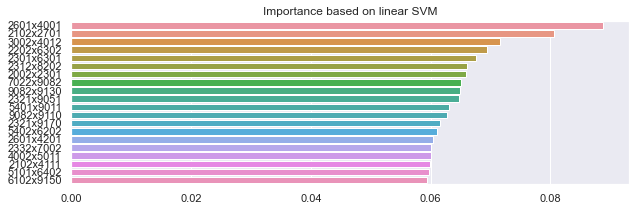

In [28]:
linear_imp_index  = linear_coefs.argsort()[::-1]
linear_imp_values = linear_coefs[linear_imp_index]
linear_imp_cols =  X.columns[linear_imp_index].values

linear_imp_cols_200 = linear_imp_cols[:200]

sns.barplot(x = linear_imp_values[:20], y = linear_imp_cols[:20]).set(title='Importance based on linear SVM')

## Permutation Importance

> #### Select Top 200 Features

In [29]:
X_subset=X.loc[:,linear_imp_cols_200]

In [30]:
from util import loco_importance, log_loss

pipe_2 = make_pipeline(
    # SimpleImputer(),
    KNNImputer(),
    SVC()
)


# BEST_PARAMS = model.best_params_ #{'svc__C': 2.5, 'svc__class_weight': None} # model.best_params_
pipe_2.set_params(**BEST_PARAMS)
pipe_2.set_params(**{'svc__probability':True})


Pipeline(steps=[('knnimputer', KNNImputer(n_neighbors=4)),
                ('svc', SVC(C=2.6600000000000006, probability=True))])

In [31]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, RepeatedKFold

kf = RepeatedKFold(n_splits = 4, n_repeats = 1)
perm_res = []

for train_idx, test_idx in tqdm(kf.split(X)):
    pipe_2.fit(X_subset.iloc[train_idx], y.iloc[train_idx])
    pr = permutation_importance(
        pipe_2, X_subset.iloc[test_idx,:], y.iloc[test_idx],
        scoring = 'accuracy',
        n_repeats = 100,n_jobs=-1
    )
    perm_res.append(pr)

4it [11:14, 168.67s/it]


In [32]:
for i,j in enumerate(perm_res):
    if i==0:
        features_imp=perm_res[i]['importances']
    else:
        features_imp=np.concatenate((features_imp,perm_res[i]['importances']),axis=1)
features_imp_mean=np.mean(features_imp,axis=1)

[Text(0.5, 1.0, 'Importance based on Permutation')]

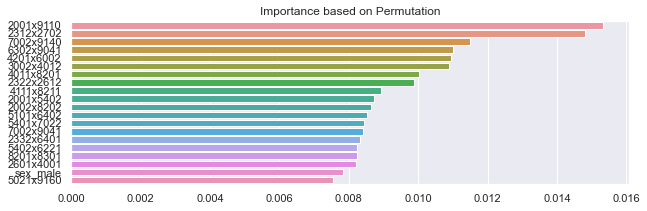

In [33]:
idx=features_imp_mean.argsort()[::-1]

sns.barplot(x = features_imp_mean[idx][:20], y = linear_imp_cols[idx][:20]).set(title='Importance based on Permutation')

## Loco

In [41]:

results=loco_importance(pipe_2, X, y, linear_imp_cols_200[idx][:10])
results

,variable,Point_Estimate_Importance,CI_Lower,CI_Upper
2,7002x9140,0.019159,-0.001651,0.046976
6,4011x8201,0.014608,0.000536,0.026822
1,2312x2702,0.014438,-0.000790,0.031248
7,2322x2612,0.014193,-0.000082,0.027957
9,2001x5402,0.010976,0.002791,0.019379
4,4201x6002,0.010457,0.000713,0.020992
8,4111x8211,0.008463,-0.000329,0.012739
5,3002x4012,0.007098,-0.002039,0.014206
3,6302x9041,0.005794,-0.001138,0.008111
0,2001x9110,0.003117,0.000203,0.008158


C:\Users\nmura\AppData\Local\Temp\ipykernel_22680\2732811266.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color=col[i])


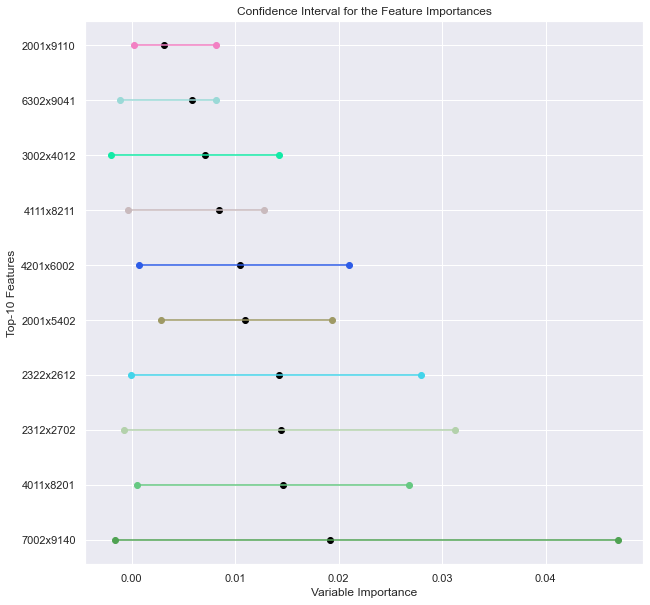

In [43]:
import random
plt.figure(figsize=(10,10))
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
col=get_colors(10) # sample return:  ['#8af5da', '#fbc08c', '#b741d0']
for i,k in enumerate(zip(results['CI_Lower'],results['CI_Upper'],range(len(results)))):
    lower,upper,y=k[0],k[1],k[2]
    
    plt.plot((lower,upper),(y,y),'ro-',color=col[i])
    plt.scatter(results['Point_Estimate_Importance'].iloc[i],y,color='black')
plt.yticks(range(len(results)),list(results['variable']))
plt.xlabel('Variable Importance')
plt.ylabel('Top-10 Features')
plt.title('Confidence Interval for the Feature Importances')
plt.show()